# Data Handling and Visuialisation (7PAM2004) – Week 4 Tutorial 

## Today we will complete remaining exercises from Weeks 2 and 3

### Objectives:
+ Experience with basic Python, numpy, pandas, and matplotlib
+ Practice reading CSV and parquet files
+ Practice manipulating arrays and making plots
+ Practice interpreting plots 

### The online python documentation is a particularly useful resource that can help you with this tutorial
### https://matplotlib.org/stable/users/index

In [ ]:
# Exercise 1 uses pyarrow to read a parquet file. This package may or may not be
# pre-installed on your machine. 
#
# If you need to install it, this can be accomplished from the Jupyter Notebook. 
# The commands are provided below. Uncomment, then run.
# pip install pyarrow
#
# If the command above doesn't work, please try the following
# !pip install pyarrow

### Exercise 1: Stars from the European Space Agency's Gaia Mission

Gaia is a European spacecraft that makes extremely precise measurements of over a billion stars in the sky 
https://www.esa.int/Science_Exploration/Space_Science/Gaia

Below we will inspect a table with 1000 randomly selected stars observed by this spacecraft. We will examine two observed quantities from this data:
- *parallax* - The apparent wobble of the star as Earth orbits our Sun (useful for calculating the star's distance)
- *apparent magnitude* - How bright the star looks in the sky (smaller magnitudes correspond to brighter sources)

We will then calculate (using formulae provided) two intrinsic properties:
- *distance* - The distance of each star from the us (the Earth/Sun)
- *absolute magnitude* - The intrinsic brightness of the star (smaller magnitudes correspond to brighter sources)

#### *Apparent magnitude* (observed) and *absolute magnitude* (intrinsic) differ because source of light appear to get dimmer when they are far away.


I have performed a query of ESA's Gaia database to pick 1000 randomly selected stars. The queried file is called: https://star.herts.ac.uk/~kuhn/DHV/gaia_random1000.parquet

Recall that a parquet file may be read with the following pandas function:
```python
gaia = pd.read_parquet('')
```

Read this file and inspect the contents.

In [3]:
# importing the packages you'll need for later
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow

gaia = pd.read_parquet('')

Now inspect the table.

In [ ]:
gaia

We want to calculate two quantities for each star: the star's distance (how far it is) and it's intrinsic brightness (how much light it produces).

Distance can be calculated from parallax, where<br><br>

<div align="center">distance = 1000/parallax.</div>

The unit for distance in astronomy is the 'parsec', where 1 parsec = $3.08\times10^{13}$ km.

The apparent magnitude (how bright it is to an observer) is given in the column phot_g_mean_mag. Distant objects appear fainter, so we need to correct for this using the following formula:<br><br>

<div align="center">absolute magnitude = phot_g_mean_mag + 5 log$_{10}$(parallax) - 10</div>

In [ ]:
# Calculates the quantities shown above
gaia['distance'] = 1000/gaia['parallax']
gaia['AbsoluteMagnitude'] = gaia['phot_g_mean_mag'] + 5*np.log10(gaia['parallax']) - 10

# It's helpful to convert some quantities to log. Each unit represents a factor of 10 increase.
gaia['log10_distance'] = np.log10(gaia['distance'])

Now inspect the table and find the columns you created.

In [ ]:
gaia

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.scatter(gaia['log10_distance'], gaia['AbsoluteMagnitude'], alpha=1, color='black', s=10)

# Brighter stars have smaller absolute magnitudes. (See above)
plt.gca().invert_yaxis()

# Add titles and labels
plt.xlabel('Log10(distance)')
plt.ylabel('Absolute Magnitude')

# Show grid (optional)
plt.grid(True)

What is happening in this plot? Is this reasonable considering that these are randomly selected stars?

Answer here.

### Example 3: Histogram

The normal (or Gaussian) distribution is a probability distribution, where the most probable values are nearest the centre, and the probability of a value decreases (but never reaches zero) farther from the centre. These distributions are described by two parameters: the mean ($\mu$), which provides the location of the centre; and the standard deviation ($\sigma$), which gives the width of the distribution. 

The formula for the normal distribution is 

$p(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

where $p(x)$ is the probability of measuring $x$.


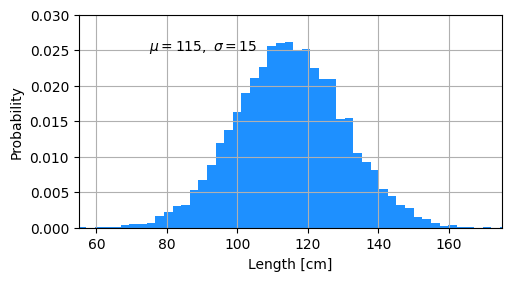

In [4]:
# Here we create a histogram of a normal distribution with mean 115 and standard deviation 15
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000) # Look up the numpy documentation for randn

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# Here is the matplotlib code for a histogram
n, bins, patches = ax.hist(x, 50, density=True, color='dodgerblue')

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')

ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Exercise 3a: 

Now adjust the code above to plot a *uniform* distribution between 0 and 1. 

You may want to examine the online documentation for numpy.random. 


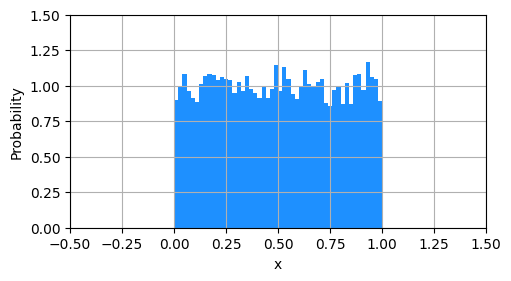

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 10000)

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# Create the histogram for the uniform distribution
n, bins, patches = ax.hist(x, 50, density=True, color='dodgerblue')

ax.set_xlabel('x')
ax.set_ylabel('Probability')

# Adjust the axis parameters for the uniform distribution range
ax.axis([-0.5, 1.5, 0, 1.5])
ax.grid(True)


### Exercise 3b: 

Now use the pandas library to import the Trees dataset from the following CSV file:

https://star.herts.ac.uk/~kuhn/DHV/trees.csv

Make a histogram of each variable.

In [6]:
import pandas as pd

url = 'https://star.herts.ac.uk/~kuhn/DHV/trees.csv'

data = pd.read_csv(url)
data.head()
data.describe()

# Write your code to obtain data from trees.csv. (Hint: use the code in the slides from the last lecture.)
# Inspect the contents of this file so you know how to use it.

,Diameter,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


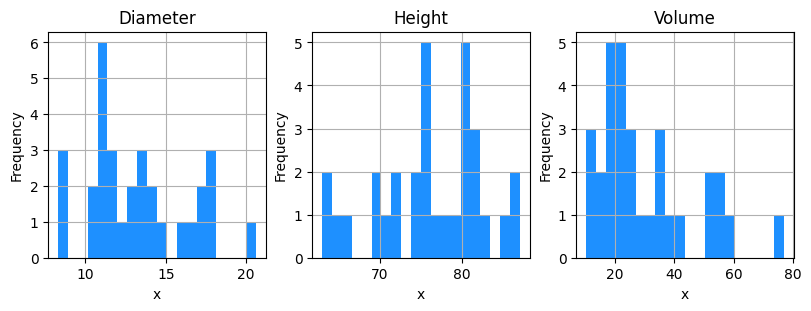

In [7]:
# Fill in the missing code. Some code has already been provided that may have helpful syntax

# 1st Way
# The following code creates 3 subplots 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), layout='constrained')


# When plotting you can access the different subplots with indices
for i in range(3):
   axes[i].hist(data.iloc[:, i], bins=20, color='dodgerblue',)
   axes[i].set_title(data.columns[i])
   axes[i].grid(True)
   axes[i].set_xlabel('x')
   axes[i].set_ylabel('Frequency')

   

### Exercise 3c:

The cumulative distribution of a proability density function $p(x)$ is given by

$F(x) = \int_{-\infty}^{x} p(x^\prime) \, dx^\prime$

For an empirical distribution, the method 
```python
ax.ecdf(x)  
```
calculates and plots the 'empirical cumulative distribution function.'

For the distributions in Example 3 and Exercise 3a, please plot the corresponding empirical cumulative distribution functions.

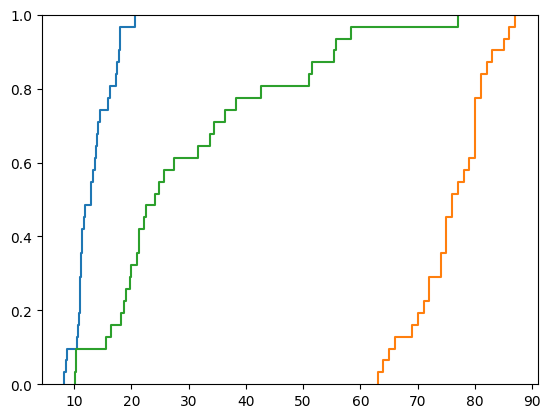

In [14]:
exercise3aData = np.random.uniform(0, 1, 10000)
exercise3bData = pd.read_csv('https://star.herts.ac.uk/~kuhn/DHV/trees.csv')

# Set up the plot
fig, ax = plt.subplots()
# 3a Data graph
# ax.ecdf(exercise3aData)

#3b Data graph
ax.ecdf(exercise3bData['Diameter'])
ax.ecdf(exercise3bData['Height'])
ax.ecdf(exercise3bData['Volume'])

#### In the following cell, please describe and explain the results from Exercise 3c. 

### Example 4: Error envelope

If you want to indicate uncertainty, the method ax.fill_between can be useful for showing the possible range of a function. The following code does not show real data, but illustrates the graphical capabilities of matplotlib.

[(0.0, 8.0),
 (0.0, 8.0),

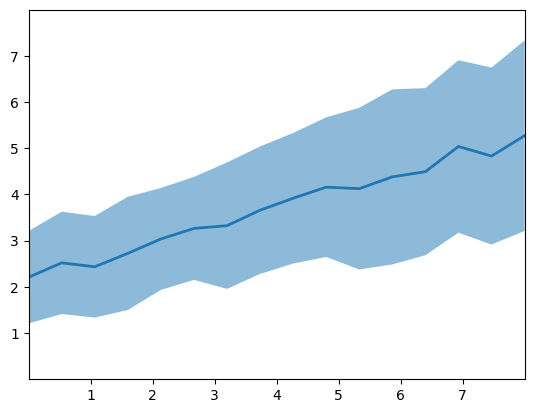

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

### Exercise 4a: 

Modify the previous code in the following ways:
+ add grid lines
+ add axis labels x and y
+ make the centre line red and the envelope pink

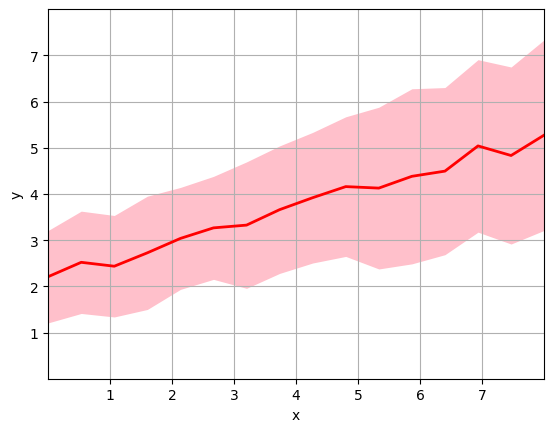

In [17]:
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))


ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
# make the centre line red and the envelope pink
ax.lines[0].set_color('red')
ax.collections[0].set_color('pink')

### Exercise 4b: 

Please explain what each step in the code above is doing. E.g., what is 'alpha'?

(You can figure this out by either experimentation or reading the documentation.)